<a href="https://colab.research.google.com/github/ImJongHwan/practice-ml-nlp/blob/main/sca/cve/cve_ner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import re
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [137]:
def read_data(url, filename):
  urllib.request.urlretrieve(url, filename=filename)

  f = open(filename, 'r')
  tagged_sentences = []
  sentence = []

  for line in f:
    try :
      strip_line = line.strip()
      if len(strip_line) == 0 or strip_line[0] == '\n':
        if len(sentence) > 0:
          tagged_sentences.append(sentence)
          sentence = []
        continue
      splits = strip_line.split()
      splits[-1] = re.sub(r'\n', '', splits[-1])
      word = splits[0].lower()
      sentence.append([word, splits[-1]])
    except IndexError:
      print('Index Error: ' + line)
  return tagged_sentences

In [138]:
def merge_without_dup(sentences1, sentences2):
  merged = sentences2
  for sen in sentences1:
    if sen not in sentences2:
      merged.append(sen)

  return merged

In [143]:
base_url = 'https://raw.githubusercontent.com/pinkymm/inconsistency_detection/master/dataset/ner_data/'
url_names = ['bypass', 'csrf', 'dirtra', 'dos', 'execution', 'fileinc', 'gainpre', 'httprs', 'infor', 'memc', 'overflow' ,'sqli', 'xss']

merged = []

for url_name in url_names:
  filename_test = url_name + "_test.txt"
  filename_train = url_name + "_train.txt"
  merged = merge_without_dup(merged, read_data(base_url + filename_test, filename_test))
  merged = merge_without_dup(merged, read_data(base_url + filename_train, filename_train))

In [145]:
print(f'전체 샘플 개수: {len(merged)}')

전체 샘플 개수: 18737


In [146]:
print('첫번째 샘플: ', merged[0])

첫번째 샘플:  [['yab', 'SN'], ['quarx', 'SN'], ['through', 'SV'], ['2.4.3', 'SV'], ['is', 'O'], ['prone', 'O'], ['to', 'O'], ['multiple', 'O'], ['persistent', 'O'], ['cross-site', 'O'], ['scripting', 'O'], ['vulnerabilities', 'O'], [':', 'O'], ['blog', 'O'], ['(', 'O'], ['title', 'O'], [')', 'O'], [',', 'O'], ['faq', 'O'], ['(', 'O'], ['question', 'O'], [')', 'O'], [',', 'O'], ['pages', 'O'], ['(', 'O'], ['title', 'O'], [')', 'O'], [',', 'O'], ['widgets', 'O'], ['(', 'O'], ['name', 'O'], [')', 'O'], [',', 'O'], ['and', 'O'], ['menus', 'O'], ['(', 'O'], ['name', 'O'], [')', 'O'], ['.', 'O']]


In [147]:
sentences, ner_tags = [], []
for tagged_sentence in merged:
  sentence, tag_info =  zip(*tagged_sentence)
  sentences.append(list(sentence))
  ner_tags.append(list(tag_info))

In [148]:
print('첫번째 샘플의 문장: ', sentences[0])
print('첫번째 샘플의 레이블: ', ner_tags[0])

첫번째 샘플의 문장:  ['yab', 'quarx', 'through', '2.4.3', 'is', 'prone', 'to', 'multiple', 'persistent', 'cross-site', 'scripting', 'vulnerabilities', ':', 'blog', '(', 'title', ')', ',', 'faq', '(', 'question', ')', ',', 'pages', '(', 'title', ')', ',', 'widgets', '(', 'name', ')', ',', 'and', 'menus', '(', 'name', ')', '.']
첫번째 샘플의 레이블:  ['SN', 'SN', 'SV', 'SV', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


샘플의 최대 길이: 198
샘플의 평균 길이: 32


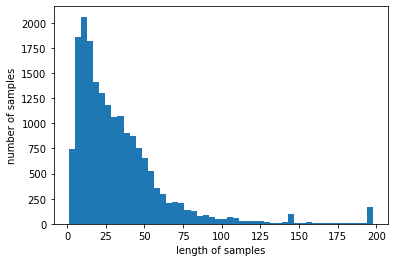

In [149]:
print('샘플의 최대 길이: %d' % max(len(sentence) for sentence in sentences))
print('샘플의 평균 길이: %d' % (sum(map(len, sentences)) / len(sentences)))
plt.hist([len(sentence) for sentence in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [150]:
vocab_size = 12000
src_tokenizer = Tokenizer(num_words=vocab_size, oov_token='OOV')
src_tokenizer.fit_on_texts(sentences)

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(ner_tags)

In [151]:
tag_size = len(tar_tokenizer.word_index) + 1
print(f'단어 집합의 크기: {vocab_size}')
print(f'개체명 태깅 정보 집합의 크기: {tag_size}')

단어 집합의 크기: 12000
개체명 태깅 정보 집합의 크기: 4


In [152]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)

In [153]:
print('첫번째 샘플의 문장: ', X_train[0])
print('첫번째 샘플의 레이블: ', y_train[0])

첫번째 샘플의 문장:  [1, 1, 88, 4884, 32, 2071, 10, 94, 2152, 155, 138, 92, 6, 1278, 3, 316, 4, 2, 4411, 3, 2699, 4, 2, 889, 3, 316, 4, 2, 1, 3, 183, 4, 2, 9, 9198, 3, 183, 4, 5]
첫번째 샘플의 레이블:  [3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [154]:
index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word

In [155]:
decoded = []
for index in X_train[0]:
  decoded.append(index_to_word[index])

print(f'기존 문장: {sentences[0]}')
print(f'빈도수가 낮은 단어가 OOV 처리된 문장: {decoded}')

기존 문장: ['yab', 'quarx', 'through', '2.4.3', 'is', 'prone', 'to', 'multiple', 'persistent', 'cross-site', 'scripting', 'vulnerabilities', ':', 'blog', '(', 'title', ')', ',', 'faq', '(', 'question', ')', ',', 'pages', '(', 'title', ')', ',', 'widgets', '(', 'name', ')', ',', 'and', 'menus', '(', 'name', ')', '.']
빈도수가 낮은 단어가 OOV 처리된 문장: ['OOV', 'OOV', 'through', '2.4.3', 'is', 'prone', 'to', 'multiple', 'persistent', 'cross-site', 'scripting', 'vulnerabilities', ':', 'blog', '(', 'title', ')', ',', 'faq', '(', 'question', ')', ',', 'pages', '(', 'title', ')', ',', 'OOV', '(', 'name', ')', ',', 'and', 'menus', '(', 'name', ')', '.']


In [156]:
max_len = 200
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)

In [112]:
y_train[0]

array([3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=777)

In [158]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [159]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (14989, 200)
훈련 샘플 레이블의 크기 : (14989, 200, 4)
테스트 샘플 문장의 크기 : (3748, 200)
테스트 샘플 레이블의 크기 : (3748, 200, 4)


In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed
from tensorflow.keras.optimizers import Adam

In [161]:
embedding_dim = 128
hidden_units = 128

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(hidden_units, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation='softmax')))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=8, validation_data=(X_test, y_test))

Epoch 1/8
118/118 [==============================] - 251s 2s/step - loss: 0.0529 - accuracy: 0.9216 - val_loss: 0.0186 - val_accuracy: 0.9618
Epoch 2/8
118/118 [==============================] - 238s 2s/step - loss: 0.0118 - accuracy: 0.9776 - val_loss: 0.0082 - val_accuracy: 0.9854
Epoch 3/8
118/118 [==============================] - 234s 2s/step - loss: 0.0057 - accuracy: 0.9893 - val_loss: 0.0062 - val_accuracy: 0.9888
Epoch 4/8
118/118 [==============================] - 234s 2s/step - loss: 0.0040 - accuracy: 0.9927 - val_loss: 0.0058 - val_accuracy: 0.9897
Epoch 5/8
118/118 [==============================] - 233s 2s/step - loss: 0.0031 - accuracy: 0.9943 - val_loss: 0.0058 - val_accuracy: 0.9903
Epoch 6/8
118/118 [==============================] - 233s 2s/step - loss: 0.0025 - accuracy: 0.9954 - val_loss: 0.0059 - val_accuracy: 0.9905
Epoch 7/8
118/118 [==============================] - 231s 2s/step - loss: 0.0021 - accuracy: 0.9961 - val_loss: 0.0059 - val_accuracy: 0.9910
Epoch 

In [162]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

118/118 [==============================] - 17s 146ms/step - loss: 0.0057 - accuracy: 0.9908

 테스트 정확도: 0.9908


In [165]:
i = 110 # 확인하고 싶은 테스트용 샘플의 인덱스.

# 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = model.predict(np.array([X_test[i]]))

# 확률 벡터를 정수 레이블로 변경.
y_predicted = np.argmax(y_predicted, axis=-1)

# 원-핫 벡터를 정수 인코딩으로 변경.
labels = np.argmax(y_test[i], -1)

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for word, tag, pred in zip(X_test[i], labels, y_predicted[0]):
    if word != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag].upper(), index_to_ner[pred].upper()))

단어             |실제값  |예측값
-----------------------------------
the              : O       O
(                : O       O
1                : O       O
)                : O       O
strip_tags       : O       O
,                : O       O
(                : O       O
2                : O       O
)                : O       O
setcookie        : O       O
,                : O       O
(                : O       O
3                : O       O
)                : O       O
OOV              : O       O
,                : O       O
(                : O       O
4                : O       O
)                : O       O
OOV              : O       O
,                : O       O
(                : O       O
5                : O       O
)                : O       O
OOV              : O       O
,                : O       O
and              : O       O
(                : O       O
6                : O       O
)                : O       O
OOV              : O       O
functions        : O       O
in        